        0/170498071 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step

<ipython-input-2-05853a41fa61>:5: DeprecationWarning: Please import `distance_transform_edt` from the `scipy.ndimage` namespace; the `scipy.ndimage.morphology` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.morphology import distance_transform_edt  # Correct import for distance transform from scipy


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


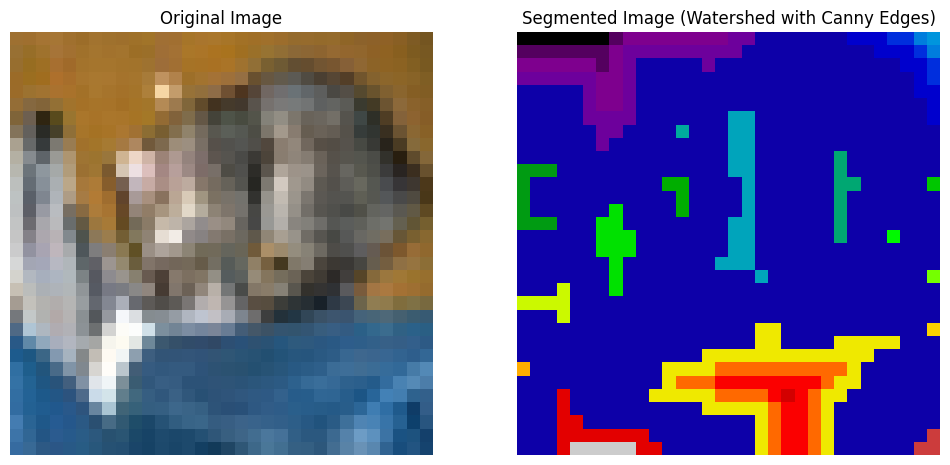

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from skimage import color, measure, segmentation, feature
from scipy.ndimage.morphology import distance_transform_edt


(x_train, y_train), (x_test, y_test) = cifar10.load_data()


x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

sample_image = x_test[0]


sample_image_gray = color.rgb2gray(sample_image)


edges = feature.canny(sample_image_gray)


distance = distance_transform_edt(~edges)

markers = measure.label(distance)
segmentation_result = segmentation.watershed(-distance, markers)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(sample_image)
plt.title("Original Image")
plt.axis('off')


plt.subplot(1, 2, 2)
plt.imshow(segmentation_result, cmap='nipy_spectral')
plt.title("Segmented Image (Watershed with Canny Edges)")
plt.axis('off')

plt.show()